In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [2]:
read_file = pd.read_csv(r'C:\Users\atsed\Desktop\Thesis_Reg\Stimuli_4_polygon.txt') 

In [3]:
read_file.to_csv (r'C:\Users\atsed\Desktop\Thesis_Reg\Thesis_Data_s4p.csv', index=None)

In [4]:
df = pd.read_table('Thesis_Data_s4p.csv')

In [5]:
df.head(10)

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli_4_Polygon
0,Skilled,602,229,366,605,232,0
1,Skilled,605,231,366,605,232,0
2,Skilled,605,229,366,605,232,0
3,Skilled,606,229,366,605,232,0
4,Skilled,608,229,366,605,232,0
5,Skilled,606,231,366,605,232,0
6,Skilled,605,233,366,605,232,0
7,Skilled,606,230,366,605,232,0
8,Skilled,604,230,366,605,232,0
9,Skilled,604,230,366,605,232,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18043 entries, 0 to 18042
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Skill_level                18043 non-null  object
 1   Gaze_point_X               18043 non-null  int64 
 2   Gaze_point_Y               18043 non-null  int64 
 3   Gaze_event_duration        18043 non-null  int64 
 4   Fixation_point_X           18043 non-null  int64 
 5   Fixation_point_Y           18043 non-null  int64 
 6   AOI_hit_Stimuli_4_Polygon  18043 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 986.9+ KB


In [ ]:
Data preprocessing

In [7]:
df.isna().sum()

Skill_level                  0
Gaze_point_X                 0
Gaze_point_Y                 0
Gaze_event_duration          0
Fixation_point_X             0
Fixation_point_Y             0
AOI_hit_Stimuli_4_Polygon    0
dtype: int64

In [8]:
sum(df.duplicated())

637

In [9]:
df.nunique()

Skill_level                    2
Gaze_point_X                 647
Gaze_point_Y                 741
Gaze_event_duration           81
Fixation_point_X             387
Fixation_point_Y             471
AOI_hit_Stimuli_4_Polygon      2
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.nunique()

Skill_level                    2
Gaze_point_X                 647
Gaze_point_Y                 741
Gaze_event_duration           81
Fixation_point_X             387
Fixation_point_Y             471
AOI_hit_Stimuli_4_Polygon      2
dtype: int64

In [12]:
sum(df.duplicated())

0

In [13]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli_4_Polygon
0,Skilled,602,229,366,605,232,0
1,Skilled,605,231,366,605,232,0
2,Skilled,605,229,366,605,232,0
3,Skilled,606,229,366,605,232,0
4,Skilled,608,229,366,605,232,0


In [15]:
ordinal_categoricals = ['Skill_level']

In [16]:
from sklearn.preprocessing import OrdinalEncoder


In [17]:
enc = OrdinalEncoder()

In [18]:
df[ordinal_categoricals] = enc.fit_transform(df[ordinal_categoricals])

In [19]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli_4_Polygon
0,1.0,602,229,366,605,232,0
1,1.0,605,231,366,605,232,0
2,1.0,605,229,366,605,232,0
3,1.0,606,229,366,605,232,0
4,1.0,608,229,366,605,232,0


In [20]:
enc.catagories_

AttributeError: 'OrdinalEncoder' object has no attribute 'catagories_'

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17406 entries, 0 to 18042
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Skill_level                17406 non-null  float64
 1   Gaze_point_X               17406 non-null  int64  
 2   Gaze_point_Y               17406 non-null  int64  
 3   Gaze_event_duration        17406 non-null  int64  
 4   Fixation_point_X           17406 non-null  int64  
 5   Fixation_point_Y           17406 non-null  int64  
 6   AOI_hit_Stimuli_4_Polygon  17406 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.1 MB


In [22]:
df.shape

(17406, 7)

In [23]:
rand_state = 1000

In [25]:
y = df['Skill_level']
X = df.drop('Skill_level', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=rand_state)

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
RF_regression = RandomForestRegressor(random_state=rand_state)
RF_regression.fit(X_train, y_train)

RandomForestRegressor(random_state=1000)

In [28]:
y_hat = RF_regression.predict(X_test)

In [29]:
predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
predictions.head()

,y_test,y_hat
6501,0.0,0.0
1518,1.0,1.0
17256,0.0,0.0
3259,0.0,0.0
15725,0.0,0.0


TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

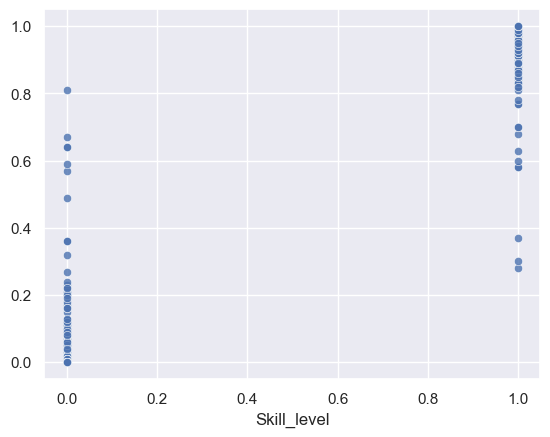

In [30]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.8)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual_Skill set', fontsize=14)
plt.ylabel('Predicted Skill set', fontsize=14)
plt.title('Actual Vs Predicted Skill level (test set)', fontsize=17)
plt.show()

In [31]:
np.round(RF_regression.score(X_test, y_test),4)

0.9917

In [32]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.0

In [33]:
param_grid = {'n_estimators':[10,100,500], 'max_features':['sqrt', 'log2'], 'max_depth':[5,10,20]}


In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
R2 = cross_val_score(estimator = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500), X = X_train, y = y_train, cv = 5, scoring="r2")

In [36]:
R2_CV = round(np.mean(R2),4)
R2_CV

0.9835

In [37]:
np.random.choice (100, size=100)

array([96, 29, 74, 80, 41, 69, 16,  3, 80, 38, 85, 46, 97, 37, 97, 43, 33,
       68, 11, 72, 31,  0, 91, 75, 29, 35,  8, 36, 55, 35, 96, 38, 64, 92,
       34, 39, 95, 79, 98, 32, 14, 98, 36, 86, 24, 38, 35, 69, 60, 17,  5,
       93, 77, 83, 46, 39, 30, 76, 53, 70,  5, 85, 42,  7, 86, 74, 67, 82,
       82, 59, 44, 64, 23, 62, 82, 43, 47, 10, 30, 37, 29,  4, 48, 26, 53,
       63, 70, 10, 66, 24, 21,  5,  1, 77, 17, 85, 13, 36, 15, 81])

In [38]:
np.unique(np.random.choice (100, size=100)).size

64

In [39]:
RF_oob = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500, oob_score=True)
RF_oob.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      oob_score=True)

In [40]:
RF_oob.oob_score_

0.9884548951839197

In [41]:
features = list(X_train.columns)
features

['Gaze_point_X',
 'Gaze_point_Y',
 'Gaze_event_duration',
 'Fixation_point_X',
 'Fixation_point_Y',
 'AOI_hit_Stimuli_4_Polygon']

In [42]:
RF_Regressor = RandomForestRegressor(n_estimators = 500, max_features='sqrt', max_depth=20, random_state=rand_state)
RF_Regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      random_state=1000)

In [43]:
importance = RF_Regressor.feature_importances_
importance

array([0.23883517, 0.09675403, 0.11669565, 0.37294589, 0.16247993,
       0.01228932])

In [44]:
FIM = pd.DataFrame({'Features': features, 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM 

,Features,Feature_importance
5,AOI_hit_Stimuli_4_Polygon,0.012289
1,Gaze_point_Y,0.096754
2,Gaze_event_duration,0.116696
4,Fixation_point_Y,0.162480
0,Gaze_point_X,0.238835
3,Fixation_point_X,0.372946


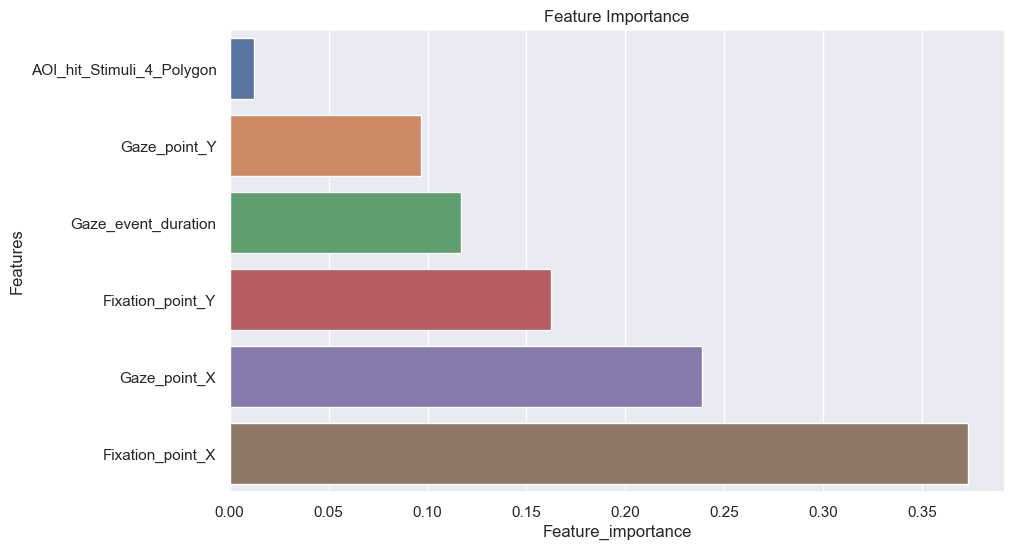

In [45]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()